###### 
The dataset attached contains the data of 160 different bags associated with ABC industries. The bags have certain attributes which are described below:

*) Height – The height of the bag

*) Width – The width of the bag

*) Length – The length of the bag

*) Weight – The weight the bag can carry

*) Weight1 – Weight the bag can carry after expansion

 

The company now wants to predict the cost they should set for a new variant of these kinds of bags based on the attributes below. As a result, they want you to build a prediction model which can correctly set the cost of the bag provided the attributes are given. The task involves the following things:

> Analyse the dataset and do EDA(Exploratory Data Analysis)

> Plotting of various graphs & correlations –

> Model Building using Multiple Linear Regression – [SGD, Mini Batch, Gradient Descent, Normal SK-Learn library]

> Calculating the R squared, RMSE and MSE for the model 
 



In [1]:
#Make necessary imports
import numpy as np
import pandas as pd
from scipy import stats 
import matplotlib.pyplot as plt
import seaborn as sn
sn.set(rc={'figure.figsize':(10,5)})
%matplotlib inline
import statsmodels.api as sm
from sklearn import metrics

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import math
import time

In [3]:
# Read the csv file into a dataframe
dataset_df = pd.read_csv("Data_miniproject.csv")

# Print Dataframe information and description
print("\n Dataset_df.info()  \n",dataset_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Cost     159 non-null    float64
 1   Weight   159 non-null    float64
 2   Weight1  159 non-null    float64
 3   Length   159 non-null    float64
 4   Height   159 non-null    float64
 5   Width    159 non-null    float64
dtypes: float64(6)
memory usage: 7.6 KB

 Dataset_df.info()  
 None


# 1.  Exploratory Data Analysis

1.1 CORRELATION AND HEATMAP

In [823]:
# Find the Correlation
dataset_df.corr()

,Cost,Weight,Weight1,Length,Height,Width
Cost,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Weight,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Weight1,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


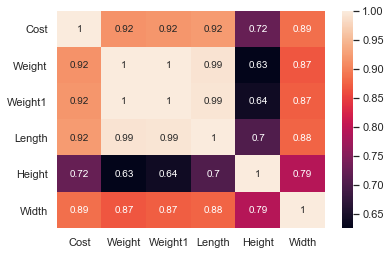

In [824]:
#Plot correlation using heatmap
sn.heatmap(dataset_df.corr(), annot=True)

The Correlation value lies between -1 and +1 . The sign indicates if it is positive or negative correlation.

Inferences:- 
1. Weight has Strong Correlation with target variable(cost)
2. Height and width have positive correlation with cost
 
  Collinerity among independent variables
3. Weight1 and Length have strong correlation with weight, so they can be removed





In [825]:
# Drop 
dataset_df.drop(['Weight1','Length'],inplace=True,axis=1)
dataset_df.columns
dataset_df.corr()

,Cost,Weight,Height,Width
Cost,1.000000,0.915712,0.724345,0.886507
Weight,0.915712,1.000000,0.625378,0.867050
Height,0.724345,0.625378,1.000000,0.792881
Width,0.886507,0.867050,0.792881,1.000000


1.2 CLEAN THE DATA

In [826]:
# Delete the row with any column with 0 or NAN value
dataset_df=dataset_df[dataset_df!=0].dropna()
dataset_df.isnull().sum()

Cost      0
Weight    0
Height    0
Width     0
dtype: int64

1.3 FIND AND REMOVE THE OUTLIERS

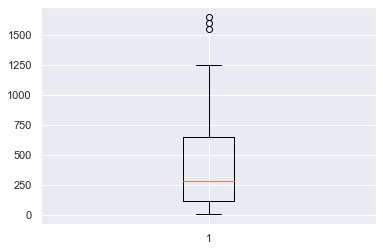

In [827]:
#Find the outliers using boxplot
box = plt.boxplot(dataset_df['Cost'])

In [828]:
# Obtain  the minimum and maximum cost
min_max=[item.get_ydata()[0] for item in box['caps']]
Cost_max = min_max[1] # maximum value of cost

# Ouliers identified - obtain their index and remove the outliers
index = dataset_df.index[dataset_df['Cost'] > Cost_max] # Identify outliers
dataset_df = dataset_df.drop(labels =index,axis=0) # Remove outliers


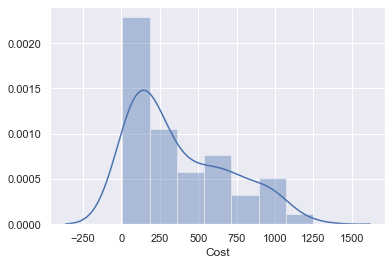

In [829]:
sn.distplot(dataset_df['Cost']) #distribution plot

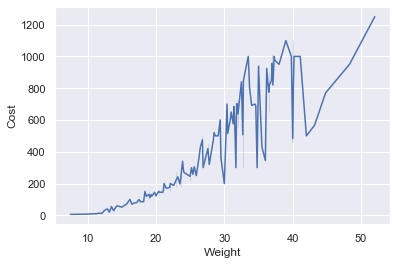

In [830]:
sn.lineplot(x='Weight',y='Cost',data=dataset_df) #line plot to get condensed view of datapoints

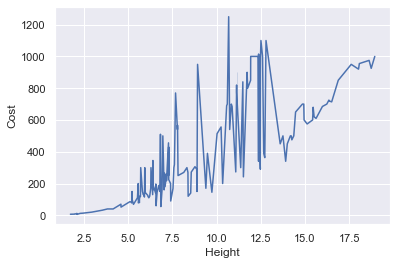

In [831]:
sn.lineplot(x='Height',y='Cost',data=dataset_df) #line plot to get condensed view of datapoints

(array([29., 32., 12., 16.,  6., 11.,  7.,  6., 12.,  4.,  5., 11.,  1.,
         2.,  1.]),
 array([   5.9 ,   88.84,  171.78,  254.72,  337.66,  420.6 ,  503.54,
         586.48,  669.42,  752.36,  835.3 ,  918.24, 1001.18, 1084.12,
        1167.06, 1250.  ]),
 <a list of 15 Patch objects>)

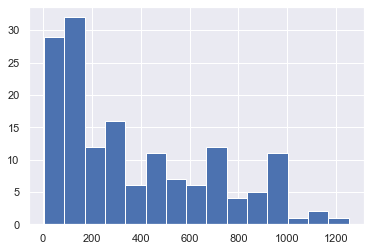

In [832]:
plt.hist(dataset_df['Cost'],bins=15)

# 1.4 Standardizing/Scaling X and Y
Stardardization is the process of bringing all features/variables into one single scale(normalized scale). This can be done by substracting mean from the values and dividing by the standard deviation of the feature or variable.StandardScaler available in sklearn.preprocessing package provides this functionality

In [833]:
X = dataset_df.iloc[:, 1:4].values 
y = dataset_df.iloc[:, 0].values 

In [834]:
#Initializing the standard scaler
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler()
X_scaled = X_scaler.fit_transform(X) #Standardize all the feature columns

#Standarding y explicitly by substracting mean and dividing by sandard deviation
y_scaled = (y-y.mean())/y.std()


# 2. Implementing Gradient Descent Algorithm
Method 1 : Method to Randomly initialize bias and weights

Method 2 : Method to calculate the predicted value of y ,y given the bias(W0) and weights(W1,W2,W3,...Wn)

Method 3 : Method to calulate the cost function from the predicted and actual value of y

Method 4 : Method to calculate the gradients and adjust the bias and weights 


In [835]:
#Method 1 : RANDOM INITIALIZATION OF BIAS(W0) AND WEIGHTS(W1,W2,W3,....Wn)
import random
def initialize(dim) :
    #For reproducible results , seed it to 42
    np.random.seed(seed=42)
    random.seed(42)
    b = random.random() #Initialize the bias
    w = np.random.rand(dim) # Initialize the weights
    return b,w

#Method 2 : PREDICT y VALUES FROM BIAS AND WEIGHTS
#Inputs :  
#    b(W0)    : bias
#    Weights  : (W1,W2,W3,...,Wn)
#    X        : the input matrix

def predict_y(b,w,X):
 return b+np.matmul(X,w)

#Method 3  : CALCULATE THE COST FUNCTION - MSE
#Inputs : 
# y     - Actual values of y
# y_hat - predicted value of y

def get_cost(y,y_hat):
    # Calculate residuals : - difference between actual and predicted values 
    y_residue = y-y_hat
    return np.sum(np.matmul(y_residue.T,y_residue))/len(y_residue)


#Method 4:  METHOD TO UPDATE BIAS AND WEIGHTS
#Parameters passed : 
# x,y : - Input and Output variables
# y_hat : - Predicted vaklue with the current bias and weights
# b-0 , w_0 :  current Bias and Weights
# learning_rate :  Learning rateto adjust the update step

def update_beta(x,y,y_hat,b_0,w_0,learning_rate):
    #Gradient of bias
    db = (np.sum(y_hat-y)*2)/len(y)
    #Gradient of Weights
    dw = (np.dot((y_hat-y),x))/len(y)
    #Update bias and beta
    b_1 = b_0 - learning_rate * db
    w_1 = w_0 - learning_rate * dw
    
    # return new bias and beta values
    return b_1,w_1


#Final Gradient Descent Algo
def run_gradient_descent(X,y,learningRate=.01,numIterations=100):
    #Initialize the bias and weights
    b,w = initialize(X.shape[1]) 
    iter_num = 0;
    
    #gd_iterations_df keeps track of cost 
    gd_iterations_df =  pd.DataFrame(columns=['iterations','cost','b(slope)','w(const)'])
    result_idx = 0
    prev_cost = cost = 0
    
    
    #Run the iterations in loop
    for each_iter in range(numIterations):
        y_hat = predict_y(b,w,X) # Calculate the predicted value of y\
        cost = get_cost(y,y_hat) # Calculate the cost
        if(prev_cost < cost and iter_num != 0 ):
            print("current cost is greater then prev cost,pt of maxima crossed @ iteration :",iter_num)
            print("Prev_cost:",prev_cost,"Current cost:",cost)
            break
        prev_b = b # save the previous bias and weights
        prev_w = w
        #Update and calculate the new values of bias and weights
        b,w = update_beta(X,y,y_hat,prev_b,prev_w,learningRate) 
        gd_iterations_df.loc[result_idx] = [iter_num,cost,b,w]
        prev_cost = cost
        result_idx = result_idx + 1
        iter_num = iter_num + 1
           
        
    print("\n ==> Final cost :",cost," \n ==> Final Estimate of bias and weight(s):", b,w)
    #Return the final bias , weights and cost at the end
    return gd_iterations_df,b,w
        


In [836]:
#Let's start with 10000 iterations and a learning rate of 0.01.
gradient1, b,w = run_gradient_descent(X_scaled,y_scaled,learningRate=.01,numIterations=10000)


 ==> Final cost : 0.1037824566719317  
 ==> Final Estimate of bias and weight(s): -1.413319861030622e-16 [0.39059183 0.21282163 0.40656261]


From the below graph,it can be noticed that the cost is still reducing and has not reached the minimum point even after 5000 iterations.
We can increase the learnig rate and verify if the cost is reaching a minimum point or not.

Text(0.5, 1.0, 'Cost(MSE) vs Iterations')

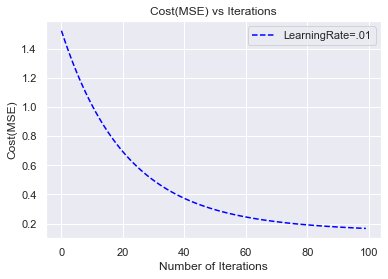

In [837]:
plot1 = gradient1[:100]
plt.plot(plot1['iterations'],plot1['cost'],label="LearningRate=.01",color ='blue',linestyle='dashed')
plt.legend()
plt.xlabel("Number of Iterations")
plt.ylabel("Cost(MSE)")
plt.title("Cost(MSE) vs Iterations")

In [838]:
#Increase the learning rate to 0.05.
gradient2, b,w = run_gradient_descent(X_scaled,y_scaled,learningRate=.05,numIterations=10000)

current cost is greater then prev cost,pt of maxima crossed @ iteration : 3013
Prev_cost: 0.10378245666009994 Current cost: 0.10378245666009997

 ==> Final cost : 0.10378245666009997  
 ==> Final Estimate of bias and weight(s): -1.4355429105321976e-16 [0.39059832 0.21282476 0.40655356]


From the below graph , we notice that with the increase in learning rate to .05 we reach the minimum point faster

Text(0.5, 1.0, 'Cost(MSE) vs Iterations')

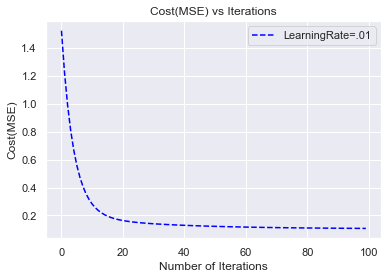

In [839]:
plot2 = gradient2[:100]
plt.plot(plot2['iterations'],plot2['cost'],label="LearningRate=.01",color ='blue',linestyle='dashed')
plt.legend()
plt.xlabel("Number of Iterations")
plt.ylabel("Cost(MSE)")
plt.title("Cost(MSE) vs Iterations")

For learning rate =.05 ,after around 60 iterations the cost is flat so the remaining iterations are not needed or will not result in any further optimization. Let us zoom in till iteration 100 and see the curve .

Also ,Now we plot the cost after every iteration for different learning rate parameters (alpha values).

Text(0.5, 1.0, 'Cost vs Iterations for different learning rate')

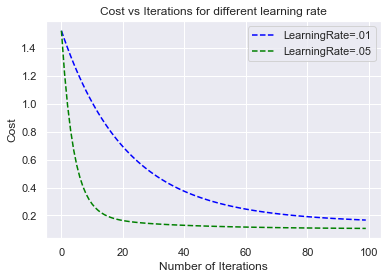

In [840]:
#plotting the cost function against iterations
plt.plot(plot1['iterations'],plot1['cost'],label="LearningRate=.01",color ='blue',linestyle='dashed')
plt.plot(plot2['iterations'],plot2['cost'],label="LearningRate=.05",color ='green',linestyle='dashed')
plt.legend()
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iterations for different learning rate")

The plot in above figure shows that the learning is faster for Learning rate0.05 compared to 0.01

# 3. Stochastic Gradient Descent
Using Sklearn library

In [841]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=10_000, tol=.001,eta0=1e-3)
sgd_reg.fit(X_scaled,y_scaled)
SGDRegressor()

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [842]:
#plt.plot(sgd_reg.history['accuracy'], label='train')
#pyplot.plot(sgd_reg.history['val_accuracy'], label='test')
#pyplot.title('lrate='+str(lrate), pad=-50)

In [843]:
print("Num of iterations :",sgd_reg.n_iter_)
print("\nCoeffcient:",sgd_reg.coef_)
print("\nIntercept :" ,sgd_reg.intercept_)

Num of iterations : 35

Coeffcient: [0.31667718 0.26237385 0.32135654]

Intercept : [-0.00088567]


In [844]:
GSD_pred_y = sgd_reg.predict(X_scaled)
print('Mean Absolute Error:%.2f'% metrics.mean_absolute_error(y_scaled, GSD_pred_y))  
print('(MSE) Mean Squared Error:%.2f'% metrics.mean_squared_error(y_scaled,GSD_pred_y))  
print('(RMSE) Root Mean Squared Error:%.2f'% np.sqrt(metrics.mean_squared_error(y_scaled,GSD_pred_y)))
print('Variance score = %.2f' % metrics.r2_score(y_scaled, GSD_pred_y))
print('Score',sgd_reg.score(X_scaled, GSD_pred_y))

Mean Absolute Error:0.28
(MSE) Mean Squared Error:0.12
(RMSE) Root Mean Squared Error:0.34
Variance score = 0.88
Score 1.0


# 3 Gradient Descent Mini batch

In [845]:

def timeit(method):
    def timed(*args, **kw):
        ts = time.time()
        result = method(*args, **kw)
        te = time.time()
        if 'log_time' in kw:
            name = kw.get('log_name', method.__name__.upper())
            kw['log_time'][name] = int((te - ts) * 1000)
        else:
            print('%r  %2.2f ms' % \
                  (method.__name__, (te - ts) * 1000))
        return result
    return timed

In [846]:
def cal_cost(theta,X,y):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

def minibatch_gradient_descent(X,y,theta,learning_rate=0.01, iterations=10, batch_size =10):
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m/batch_size)
    for it in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            X_i = np.c_[np.ones(len(X_i)),X_i]
            theta = np.ones(4) #Parameters
            theta = np.expand_dims(theta, axis=0)
            theta = np.transpose(theta)
            prediction = np.dot(X_i,theta)
            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
    return theta, cost_history

In [847]:
learningRate = .05
num_iterations = 10000
batch_size = 5
theta = np.random.randn(4, 1)
theta,cost_history = minibatch_gradient_descent(X_scaled,y_scaled,theta,learningRate,num_iterations,batch_size)
print('Mini Batch SGD')
print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))
print('(RMSE) Root Mean Squared Error:%.2f'% np.sqrt(cost_history[-1]))

Mini Batch SGD
Theta0:          1.000,
Theta1:          0.993
Final cost/MSE:  16700.752
(RMSE) Root Mean Squared Error:129.23


Text(0.5, 1.0, 'Cost(MSE) vs Iterations')

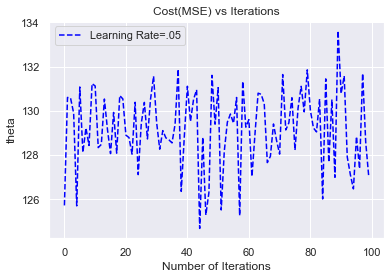

In [848]:
plt.plot(range(100),np.sqrt(cost_history[:100]),label='Learning Rate=.05',color ='blue',linestyle='dashed')
#plt.plot(range(n_iter),cost_history,color ='blue',linestyle='dashed')
plt.legend()
plt.xlabel("Number of Iterations")
plt.ylabel("theta")
plt.title("Cost(MSE) vs Iterations")

# 4. Multiple Linear Regression

In [849]:
#Split data set into training data and test/validation data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=0)


In [850]:
# Fit Simple Linear Regression to the Training dataset
from sklearn.linear_model import LinearRegression

# Create the model
model = LinearRegression()

# Train the model, using training data set
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [851]:
print("\nCoefficient(m)W1 :",model.coef_)
print("\nIntercept(C)W0   :",model.intercept_)


Coefficient(m)W1 : [0.3922751  0.20443544 0.4352004 ]

Intercept(C)W0   : -0.007762407551654898


In [852]:
# Use trained model to predict on test dataset
y_pred = model.predict(X_test)

In [853]:
from sklearn.metrics import mean_squared_error, r2_score

print('Mean Absolute Error:%.2f'% metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:%.2f'% metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:%.2f'% np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Explained variance score: 1 is perfect prediction.
# R^2 (coefficient of determination) regression score function.
# Best possible score is 1.0, a
# a constant model that always predicts the expected value of y, disregarding the input features, 
#would get a R^2 score of 0.0.

print('Variance score = %.2f' % r2_score(y_test, y_pred))

Mean Absolute Error:0.27
Mean Squared Error:0.10
Root Mean Squared Error:0.32
Variance score = 0.90


In [861]:
model_1 = sm.OLS(y_train, X_train).fit()
model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.893   
Dependent Variable:     y                AIC:                         78.5330 
Date:                   2020-05-06 21:49 BIC:                         86.9939 
No. Observations:       124              Log-Likelihood:              -36.267 
Df Model:               3                F-statistic:                 345.2   
Df Residuals:           121              Prob (F-statistic):          4.07e-59
R-squared (uncentered): 0.895            Scale:                       0.10770 
------------------------------------------------------------------------------------
           Coef.        Std.Err.         t          P>|t|        [0.025       0.975]
------------------------------------------------------------------------------------
x1         0.3919         0.0662       5.9174       0.0000       0.2608       0.5231
x2         0.2039         0.0495       4.1174       0.0001       0.1059       0.3020
x3         0.4358         0.0823       5.2932       0.0000       0.2728       0.5988
------------------------------------------------------------------------------
Omnibus:                   15.193           Durbin-Watson:              1.921 
Prob(Omnibus):             0.001            Jarque-Bera (JB):           17.784
Skew:                      0.928            Prob(JB):                   0.000 
Kurtosis:                  3.027            Condition No.:              6     
==============================================================================

"""

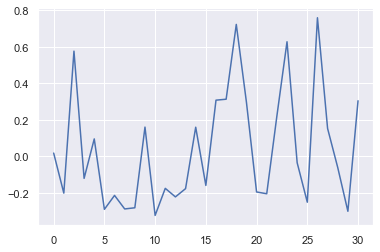

In [860]:
plt.plot(y_test-y_pred)